# Developing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from reservoir_simulator import ReservoirSim 

#%load_ext autoreload
#%autoreload 2   
#%load_ext line_profiler

# Random number generator
rng = np.random.default_rng()

In [2]:
nx = ny = 50
dt = np.ones(10)*0.0001
perm_field = rng.normal(size=nx*ny).reshape(nx, ny)*10 + 100
wells = ([1, 2, 180], [20, 10, 120], [40, 33, 200], [10, 45, 120], [30, 20, 80])
RSim = ReservoirSim(perm_field, wells=None)
ph = RSim(dt)

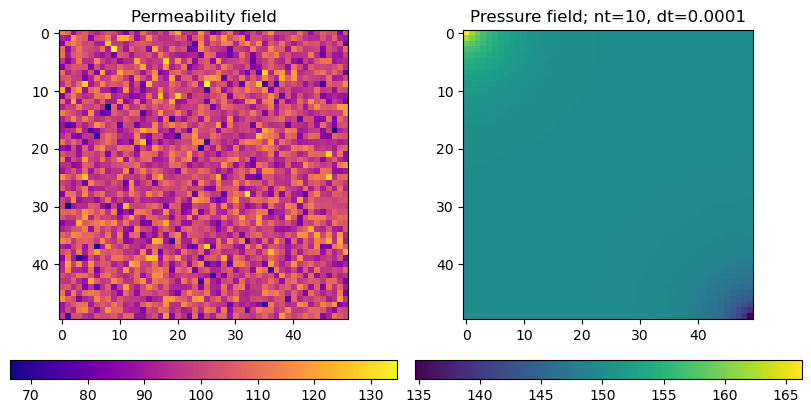

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4), sharex=True, constrained_layout=True)

axs[0].set_title("Permeability field")
i1 = axs[0].imshow(perm_field, cmap='plasma', aspect='equal')
plt.colorbar(i1, ax=axs[0], orientation='horizontal')

axs[1].set_title(f"Pressure field; nt={dt.size}, dt={dt.mean()}")
i2 = axs[1].imshow(ph[dt.size, :, :], aspect='equal')
plt.colorbar(i2, ax=axs[1], orientation='horizontal')

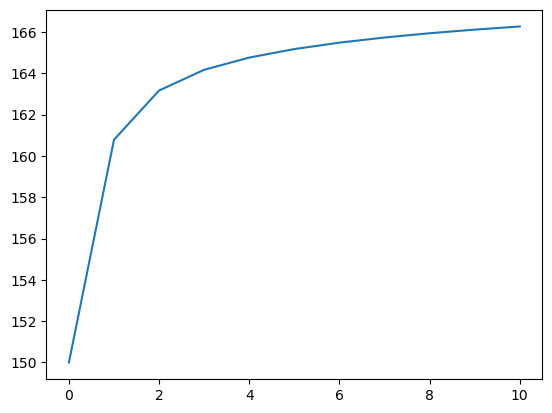

In [4]:
plt.plot(ph[:, 0, 0])